<a href="https://colab.research.google.com/github/KunalGit875/gen-ai-travelbot/blob/main/Stock_Market_Predictor_Actual_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install yfinance

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
tickerSymbol_Kellogg = 'K'
tickerSymbol_KeyCorp = 'KEY'
tickerSymbol_Kimberly = 'KMB'
tickerSymbol_Knight = 'KNX'
tickerSymbol_Kohl = 'KSS'

startDate = '2019-08-21'
endDate = '2024-08-20'

In [ ]:

tickerData = yf.Ticker(tickerSymbol_Kellogg)
hist = tickerData.history(start=startDate, end=endDate)


Price charts (daily, weekly, monthly)

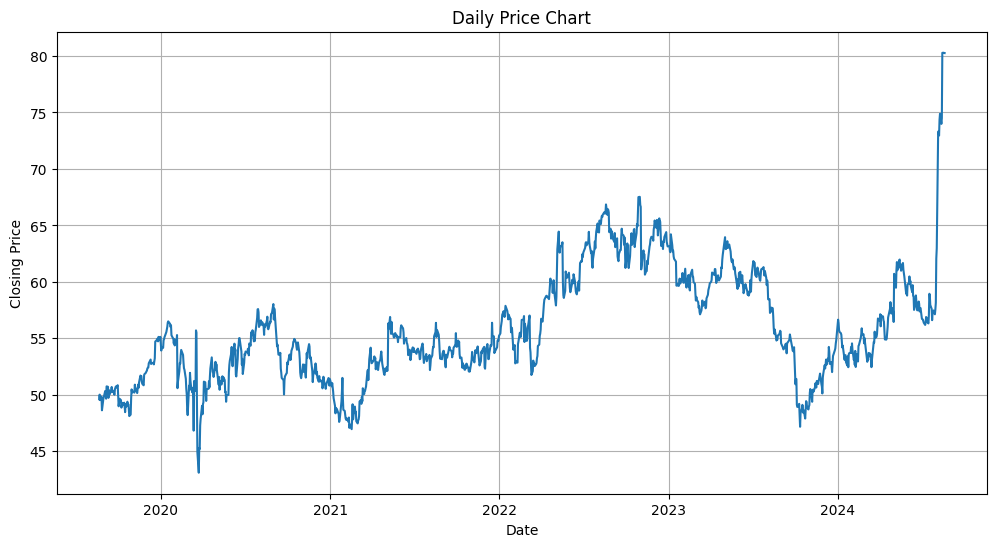

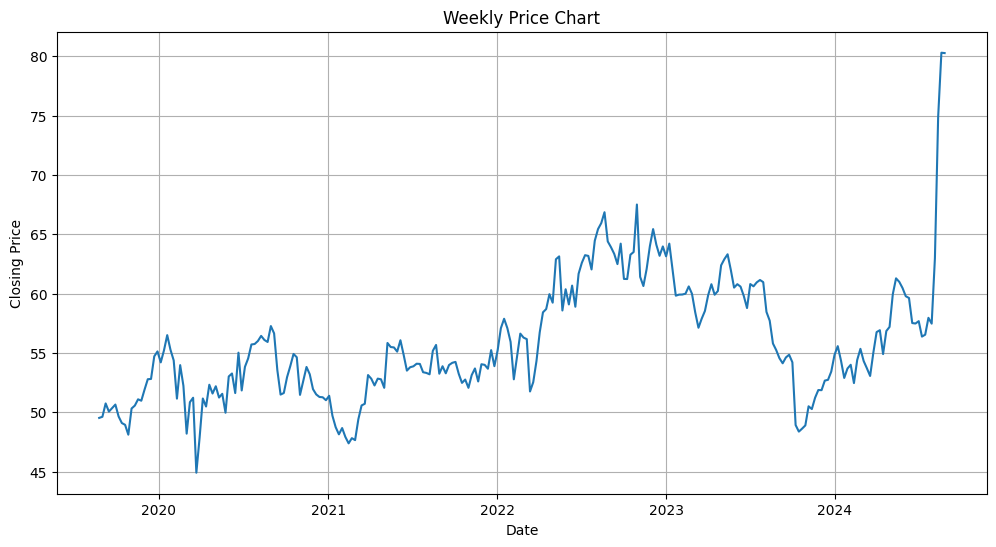

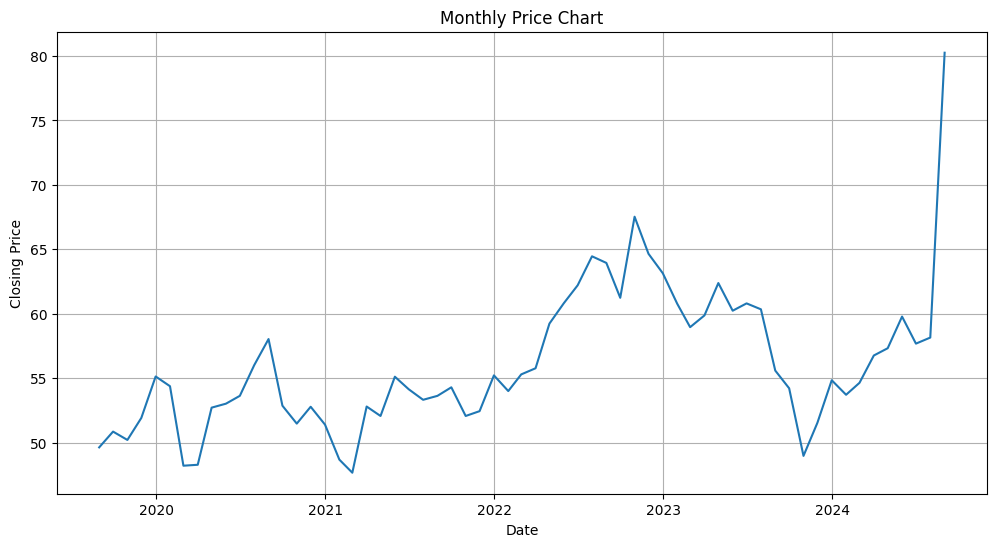

In [ ]:
def pricecharts(tickersymbol):
  tickerData = yf.Ticker(tickersymbol)
  hist = tickerData.history(start=startDate, end=endDate)

  # Daily Chart
  plt.figure(figsize=(12, 6))
  plt.plot(hist['Close'])
  plt.title('Daily Price Chart')
  plt.xlabel('Date')
  plt.ylabel('Closing Price')
  plt.grid(True)
  plt.show()

  # Weekly Chart
  weekly_data = hist['Close'].resample('W').last() # resample W gives you a weekly data

  plt.figure(figsize=(12, 6))
  plt.plot(weekly_data)
  plt.title('Weekly Price Chart')
  plt.xlabel('Date')
  plt.ylabel('Closing Price')
  plt.grid(True)
  plt.show()

  # Monthly Chart
  monthly_data = hist['Close'].resample('M').last()

  plt.figure(figsize=(12, 6))
  plt.plot(monthly_data)
  plt.title('Monthly Price Chart')
  plt.xlabel('Date')
  plt.ylabel('Closing Price')
  plt.grid(True)
  plt.show()
pricecharts(tickerSymbol_Kellogg)

Lifetime high and low

In [ ]:
def lifetime_high_low(tickerSymbol):
  tickerData = yf.Ticker(tickerSymbol)
  hist = tickerData.history(start=startDate, end=endDate)
  # 52-Week High and Low
  high_52w = hist['High'][-252:].max()
  low_52w = hist['Low'][-252:].min()

  print("52-Week High:", high_52w)
  print("52-Week Low:", low_52w)

  # All-Time High and Low
  high_all_time = hist['High'].max()
  low_all_time = hist['Low'].min()

  print("All-Time High:", high_all_time)
  print("All-Time Low:", low_all_time)
lifetime_high_low(tickerSymbol_Kellogg)

52-Week High: 80.45999908447266
52-Week Low: 46.2105864589466
All-Time High: 80.45999908447266
All-Time Low: 42.377598508194446


Risk measures (standard deviation, beta)


In [ ]:
def betastddiv(tickerSymbol,startDate,endDate):
  tickerData = yf.Ticker(tickerSymbol)
  hist = tickerData.history(start=startDate, end=endDate)

  std_dev = np.std(hist['Close'])
  print("Standard Deviation:", std_dev)
  # Beta
  ticker_symbol = 'K'
  market_symbol = '^GSPC' # S&P 500 ticker

  # using s&p 500
  market_data = yf.Ticker(market_symbol)
  markhist = market_data.history(start=startDate, end=endDate)

  # Calculate covariance and variance
  covariance = np.cov(hist['Close'].pct_change().dropna(), markhist['Close'].pct_change().dropna())[0][1]  # cov gives you a matrix [[Var(X), Cov(X, Y)], [Cov(X, Y), Var(Y)]]
  variance_market = np.var(markhist['Close'].pct_change().dropna()) # Pctchange gives you the change everyday
  #dropna
  # Calculate beta
  beta = covariance / variance_market
  print("Beta:", beta)
  return std_dev, beta
std_div,beta = betastddiv(tickerSymbol_Kellogg,'2019-08-21','2024-08-20')


Standard Deviation: 4.953719899477448
Beta: 0.3004170699423338


Return measures (daily, monthly, annual returns)

In [ ]:
def return_measures(tickerSymbol):
  tickerData = yf.Ticker(tickerSymbol)
  hist = tickerData.history(start=startDate, end=endDate)
  daily = hist['Close'].pct_change().dropna()
  monthly = daily.resample('M').last().pct_change().dropna()
  annual = daily.resample('Y').last().pct_change().dropna
  print("Daily Returns:")
  print(daily)
  print("\nMonthly Returns:")
  print(monthly)
  print("\nAnnual Returns:")
  print(annual)
return_measures(tickerSymbol_Kellogg)

Daily Returns:
Date
2019-08-22 00:00:00-04:00    0.008208
2019-08-23 00:00:00-04:00   -0.009707
2019-08-26 00:00:00-04:00    0.006324
2019-08-27 00:00:00-04:00   -0.024352
2019-08-28 00:00:00-04:00    0.006602
                               ...   
2024-08-13 00:00:00-04:00    0.006893
2024-08-14 00:00:00-04:00    0.077584
2024-08-15 00:00:00-04:00    0.000000
2024-08-16 00:00:00-04:00    0.000125
2024-08-19 00:00:00-04:00   -0.000374
Name: Close, Length: 1256, dtype: float64

Monthly Returns:
Date
2019-09-30 00:00:00-04:00    -0.406474
2019-10-31 00:00:00-04:00    -2.404736
2019-11-30 00:00:00-05:00    -1.224463
2019-12-31 00:00:00-05:00     3.492321
2020-01-31 00:00:00-05:00    -2.760610
2020-02-29 00:00:00-05:00    -0.073372
2020-03-31 00:00:00-04:00     0.675786
2020-04-30 00:00:00-04:00    -1.612068
2020-05-31 00:00:00-04:00    -0.232728
2020-06-30 00:00:00-04:00     1.122908
2020-07-31 00:00:00-04:00    -2.505213
2020-08-31 00:00:00-04:00    -1.592709
2020-09-30 00:00:00-04:00    

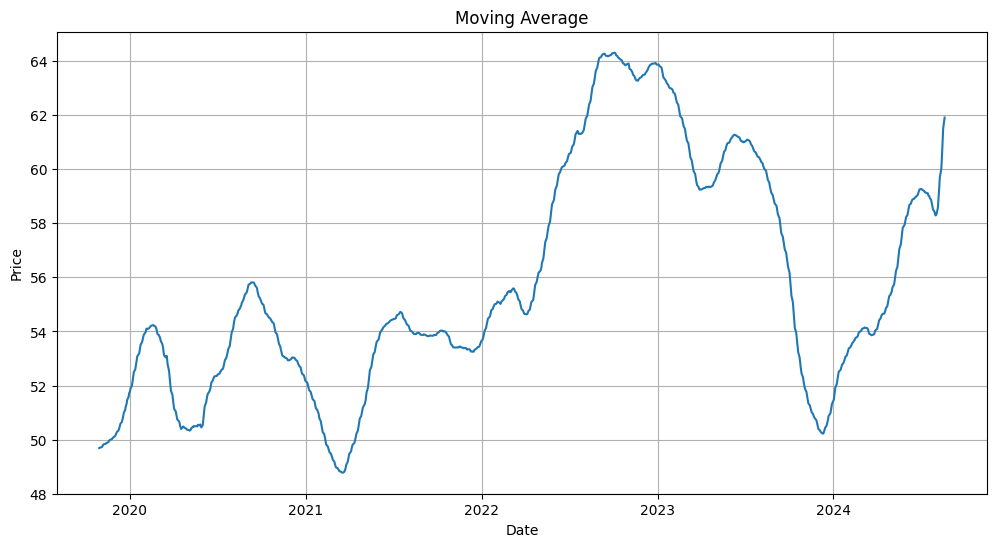

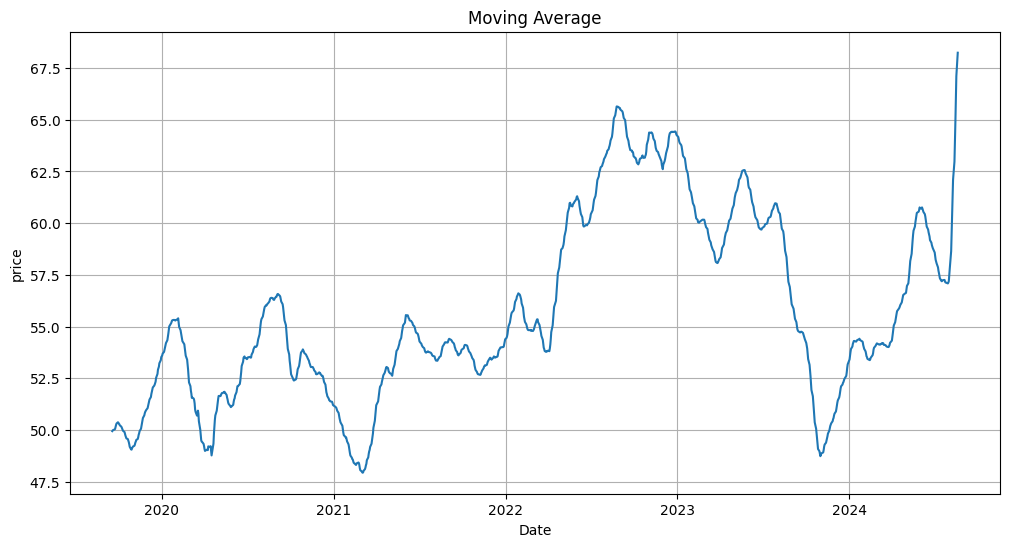

In [ ]:
def movav20(tickerSymbol):
  tickerData = yf.Ticker(tickerSymbol)
  hist = tickerData.history(start=startDate, end=endDate)

  plt.figure(figsize=(12, 6))
  av = hist['Close'].rolling(window= 20).mean().dropna()
  plt.plot(av)
  plt.title('Moving Average')
  plt.xlabel('Date')
  plt.ylabel('price')
  plt.grid(True)
  plt.show()
def movav50(tickerSymbol):
  tickerData = yf.Ticker(tickerSymbol)
  hist = tickerData.history(start=startDate, end=endDate)

  plt.figure(figsize=(12, 6))
  av = hist['Close'].rolling(window= 50).mean().dropna()
  plt.plot(av)
  plt.title('Moving Average')
  plt.xlabel('Date')
  plt.ylabel('Price')
  plt.grid(True)
  plt.show()
movav50(tickerSymbol_Kellogg)
movav20(tickerSymbol_Kellogg)

RSI (14-day)

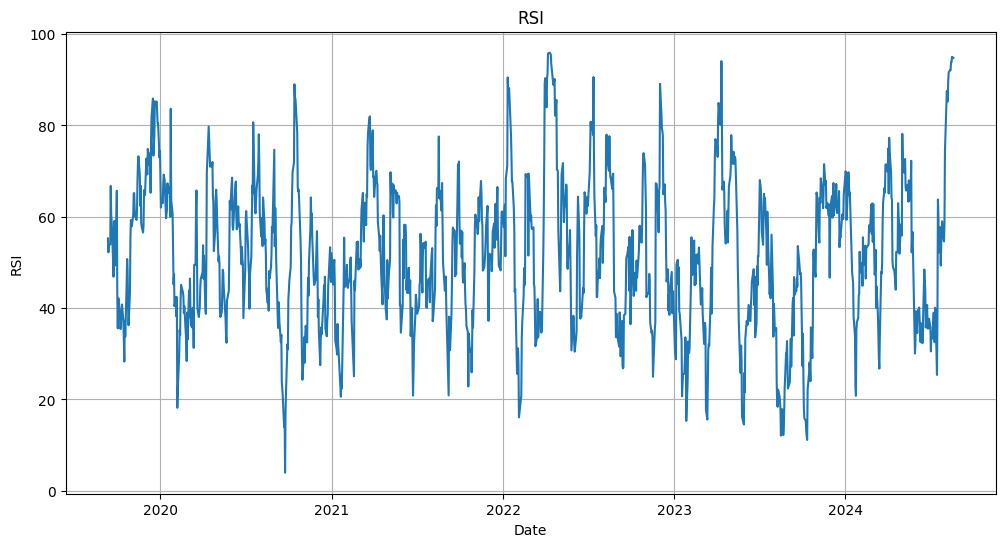

In [ ]:
delta = hist['Close'].diff().dropna()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
rsi = 100 - (100 / (1 + rs)) #avggain/ avg *100
plt.figure(figsize=(12, 6))
plt.plot(rsi)
plt.title('RSI')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.grid(True)
plt.show()


MACD( (Moving Average Convergence Divergence) (12-day, 26-day, 9-day signal)

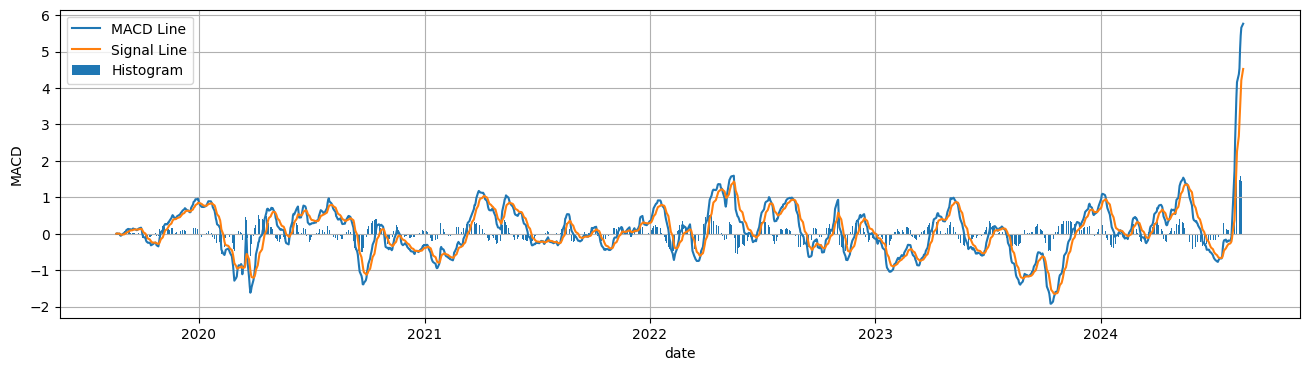

In [ ]:
'''MACD Line: The difference between a 12-period Exponential Moving Average (EMA) and a 26-period EMA of the closing price.
Signal Line: A 9-period EMA of the MACD line.
Histogram: The difference between the MACD line and the signal line, often displayed as a bar chart.'''
'''Crossovers: When the MACD line crosses above the signal line, it's often considered a bullish signal (potential buy).
    When the MACD line crosses below the signal line, it's often considered a bearish signal (potential sell).
Divergence: When the price of a security makes a new high (or low) but the MACD doesn't, it can signal a potential trend reversal.
Histogram: The height of the histogram bars indicates the strength of the trend.
  Widening bars suggest increasing momentum, while narrowing bars suggest decreasing momentum.'''

ema_12 = hist['Close'].ewm(span=12).mean()
ema_26 = hist['Close'].ewm(span=26).mean()

macd_line = ema_12 - ema_26

signal_line = macd_line.ewm(span=9).mean() #Exponential Weighted Moving Average ewm

macd_histogram = macd_line - signal_line

plt.figure(figsize=(16,4))
plt.xlabel('date')
plt.ylabel('MACD')
plt.grid(True)
plt.plot(macd_line, label='MACD Line')
plt.plot(signal_line, label='Signal Line')
plt.bar(macd_histogram.index, macd_histogram, label='Histogram')
plt.legend()
plt.show()

MACD has a positive value whenever the 12-period EMA is above the 26-period EMA and a negative value when the 12-period EMA is below the 26-period EMA.The level of distance that MACD is above or below its baseline indicates that the distance between the two EMAs is growing.If MACD is above the signal line, the histogram will be above the MACD’s baseline or zero line. If MACD is below its signal line, the histogram will be below the MACD’s baseline.Traders may buy the security when the MACD line crosses above the signal line and sell—or short—the security when the MACD line crosses below the signal line.

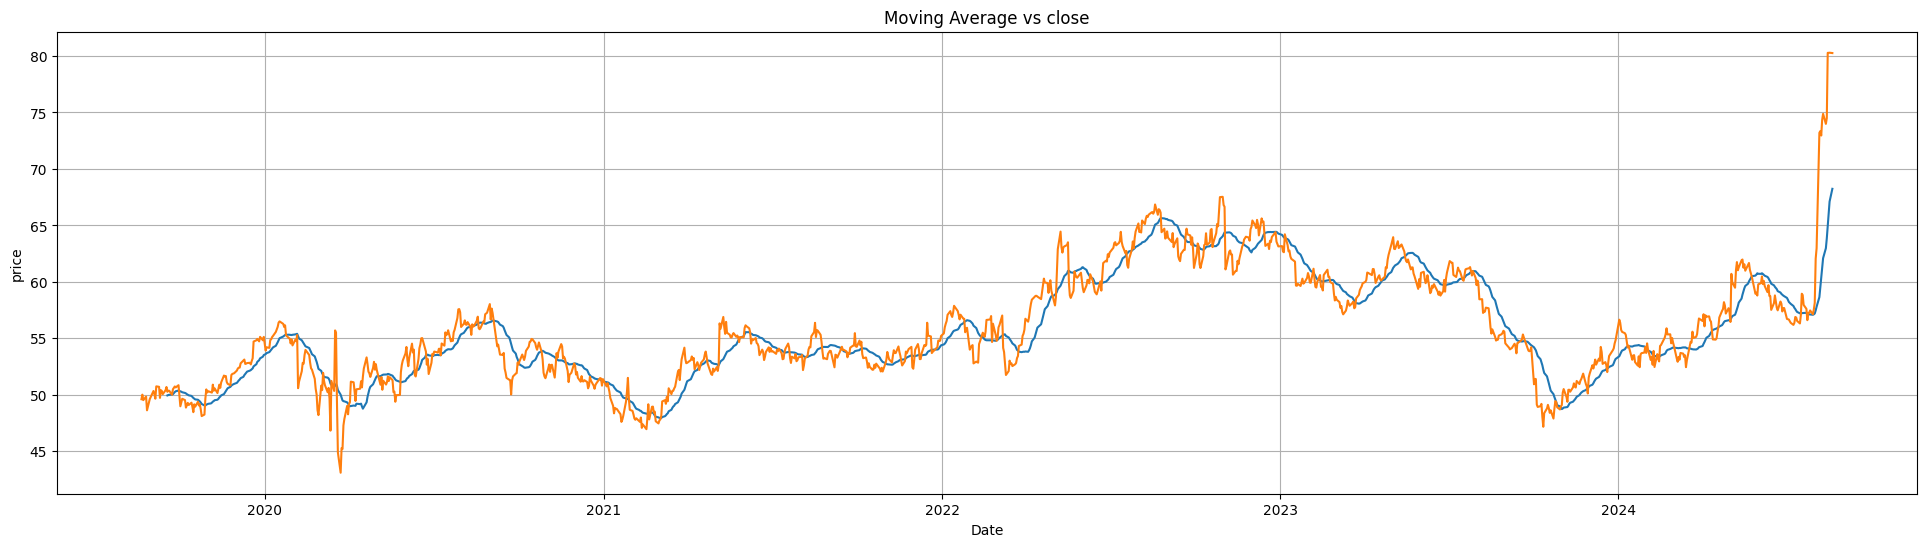

In [ ]:
# Moving average vs close
tickerData = yf.Ticker(tickerSymbol_Kellogg)
hist = tickerData.history(start=startDate, end=endDate)
plt.figure(figsize=(24, 6))
av = hist['Close'].rolling(window= 20).mean().dropna()
plt.plot(av)
plt.plot(hist['Close'])
plt.title('Moving Average vs close')
plt.xlabel('Date')
plt.ylabel('price')
plt.grid(True)
plt.show()

anlyzing the moving average wrt close average
bullish (up treand) - moving average < close average
bearish ( down tread) -  moving average > close average
trend swap - moving average = close average

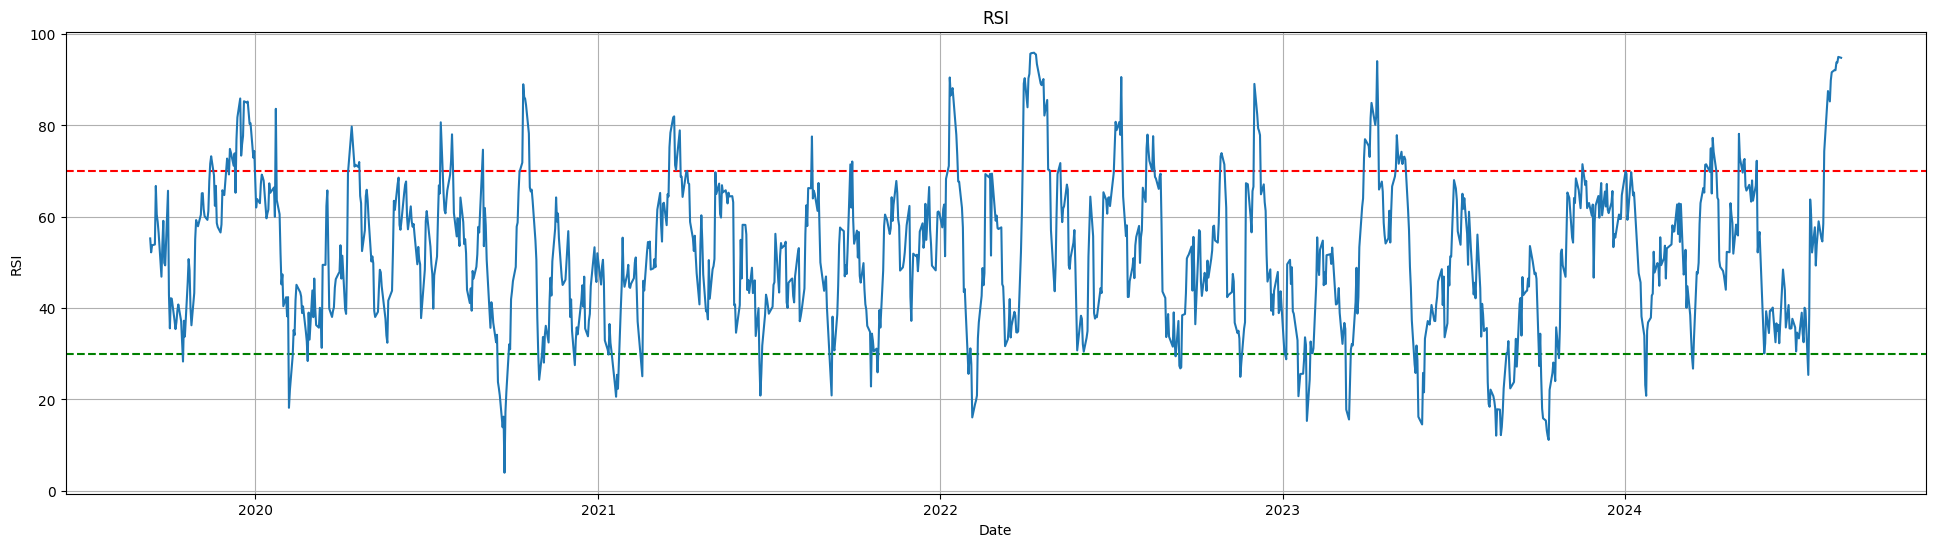

In [ ]:
# RSI 30 - 70
delta = hist['Close'].diff().dropna()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
rsi = 100 - (100 / (1 + rs)) #avggain/ avg *100
plt.figure(figsize=(24, 6))
plt.axhline(y=70, color='red', linestyle='--')
plt.axhline(y=30, color='green', linestyle='--')
plt.plot(rsi)
plt.title('RSI')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.grid(True)
plt.show()

above 70 (red line) -  bullish trend - supply limited , lot of demand,  price might drop , if we are buying overpay
below 30 (blue line) - bearish trend - supply a lot, very less demand , underpaying for stock

**bold text**

In [ ]:
ticker_symbol = 'K'
info = yf.Ticker(ticker_symbol).info
ticker = yf.Ticker(ticker_symbol)
financials = ticker.financials
bookValue = info.get('bookValue')
sharesOutstanding = info.get('sharesOutstanding')
roe = info.get('returnOnEquity')
shareholdersEquity = sharesOutstanding*bookValue


# Valuation Ratios
pe_ratio = info.get('trailingPE', None)
pb_ratio = info.get('priceToBook', None)
ev_ebitda = info.get('enterpriseToEbitda', None)

# Profitability Ratios
net_income = financials.loc['Net Income']
totalRevenue = financials.loc['Total Revenue']
profitMargin = net_income/totalRevenue
roe = info.get('returnOnEquity')
roa = info.get('returnOnAssets')

# Growth Parameters
revenue_growth = info.get('revenueGrowth')
eps_growth = info.get('earningsGrowth')

#Cash Flow Parameters
freeCashFlow = info.get('freeCashflow')
cashConversionCycle = info.get('cashConversionCycle')

#Working Capital Management
currentAssets = info.get('totalCurrentAssets')
currentLiabilities = info.get('totalCurrentLiabilities')


#currentRatio = currentAssets/currentLiabilities
currentRatio = info.get('currentRatio')
quickRatio = info.get('quickRatio')
inventory = info.get('inventory')
#quickRatio = (currentAssets-inventory)/currentLiabilities

print("Valuation Ratios")
print("P/E Ratio:", pe_ratio)
print("P/B Ratio:", pb_ratio)
print("EV/EBITDA:", ev_ebitda)
print("Profitability Ratios")
print("ROE:", roe)
print("ROA:", roa)
print("Profit Margin:", profitMargin)
print("Growth Parameters")
print("Revenue Growth:", revenue_growth)
print("EPS Growth:", eps_growth)
print("Cash Flow Parameters")
print("Free Cash Flow:", freeCashFlow)
print("Cash Conversion Cycle:", cashConversionCycle)
print("Working Capital Management")
print("Current Ratio:", currentRatio)
print("Quick Ratio:", quickRatio)


None
None
Valuation Ratios
P/E Ratio: 32.139442
P/B Ratio: 8.350067
EV/EBITDA: 17.882
Profitability Ratios
ROE: 0.22856002
ROA: 0.05696
Profit Margin: 2023-12-31    0.072474
2022-12-31    0.075871
2021-12-31    0.126671
2020-12-31     0.09085
dtype: object
Growth Parameters
Revenue Growth: -0.047
EPS Growth: -0.034
Cash Flow Parameters
Free Cash Flow: 488500000
Cash Conversion Cycle: None
Working Capital Management
Current Ratio: 0.727
Quick Ratio: 0.405


In [ ]:

def returnPeriod(ticker, start_date, end_date):

  ticker_data = yf.Ticker(ticker)
  hist = ticker_data.history(start=start_date, end=end_date)

  # Get dividends (sum of dividends within the period)
  dividends = ticker_data.dividends.loc[start_date:end_date].sum()

  # Get beginning and ending prices
  P_begin = hist['Close'].iloc[0]
  P_end = hist['Close'].iloc[-1]
  Rp = (P_end-P_begin+dividends)/P_begin
  return Rp

# accourding to ycharts.com the risk free rate is given at 4.21%
ticker_symbol = 'K'
start_date = '2021-01-01'
end_date = '2023-12-31'

Rps = returnPeriod('^GSPC','2021-01-01','2023-01-01')
Rp = returnPeriod(ticker_symbol, start_date, end_date)
riskfreerate = 0.0421
std_div,beta = betastddiv(tickerSymbol_Kellogg,'2023-08-21','2024-08-20')

#Sharpe Ratio
sharpe_ratio = (Rp - riskfreerate) / std_div
print("Sharpe Ratio:", sharpe_ratio)

#Treynor Ratio
treynor_ratio = (Rp - riskfreerate) / beta
print("Treynor Ratio:", treynor_ratio)

#Jensen's Alpha
alpha = Rp - riskfreerate - beta * (Rps - riskfreerate)
print("Jensen's Alpha:", alpha)


Standard Deviation: 5.49973095172536
Beta: -0.24487115042129912
Sharpe Ratio: 0.03063912846074715
Treynor Ratio: -0.6881454301151665
Jensen's Alpha: 0.16738556663054083


A higher Treynor/ Sharpe Ratio indicates a better risk-adjusted return relative to market risk. It shows how well the investment compensates the investor for taking on additional market risk

A positive Jensen's Alpha indicates that the investment has outperformed the market after adjusting for its risk, while a negative alpha suggests underperformance. It reflects the skill of the portfolio manager or the inherent advantages of the investment strategy.

In [ ]:

def construct_portfolio(primary_ticker, other_tickers, start_date, end_date):

  # Get historical data for all stocks
  all_tickers = [primary_ticker] + other_tickers
  data = yf.download(all_tickers, start=start_date, end=end_date)['Adj Close']
  val = []
  for i in (other_tickers):
    tickerData = yf.Ticker(i)
    hist = tickerData.history(start='2023-01-03', end='2023-01-04')
    high_52w = hist['Close']
    val.append(high_52w)
    #print(val)

  # Calculate weights
  primary_weight = 0.3
  remaining_weight = (1 - primary_weight) / len(other_tickers)
  weights = [primary_weight] + [remaining_weight] * len(other_tickers)
  #print(data)
  # Construct portfolio
  portfolio = data * weights
  portfolio['Total'] = portfolio.sum(axis=1)

  return portfolio

# Given parameters
tickerSymbol_Kellogg = 'K'
tickerSymbol_KeyCorp = 'KEY'
tickerSymbol_Kimberly = 'KMB'
tickerSymbol_Knight = 'KNX'
tickerSymbol_Kohl = 'KSS'

startDate = '2019-08-21'
endDate = '2024-08-20'

# Example usage
primary_ticker = tickerSymbol_Kellogg
other_tickers = [tickerSymbol_KeyCorp, tickerSymbol_Kimberly, tickerSymbol_Knight, tickerSymbol_Kohl]

portfolio = construct_portfolio(primary_ticker, other_tickers, startDate, endDate)
print(portfolio)

[*********************100%%**********************]  5 of 5 completed


Ticker              K       KEY        KMB       KNX       KSS      Total
Date                                                                     
2019-08-21  14.882331  2.244241  20.953476  5.752136  6.320428  50.152612
2019-08-22  15.004492  2.270274  20.934278  5.695233  6.356692  50.260968
2019-08-23  14.858841  2.189437  20.436688  5.397333  6.067934  48.950232
2019-08-26  14.952808  2.212309  20.708366  5.367209  6.090766  49.331457
2019-08-27  14.588681  2.191517  20.839787  5.313655  6.010183  48.943822
...               ...       ...        ...       ...       ...        ...
2024-08-13  22.350000  2.745750  24.227000  9.168250  3.417750  61.908750
2024-08-14  24.084000  2.737000  24.643501  9.117500  3.358250  63.940251
2024-08-15  24.084000  2.835000  24.811500  9.387000  3.482500  64.599999
2024-08-16  24.087000  2.868250  24.930501  9.353750  3.578750  64.818252
2024-08-19  24.078001  2.922500  25.105501  9.434250  3.494750  65.035002

[1257 rows x 6 columns]


In [ ]:
import yfinance as yf

def constructPortfolio(pTicker, oTickers):
    # Download the latest adjusted close prices for the stocks
    tickers = [pTicker] + oTickers
    data = yf.download(tickers, period='1d')['Adj Close']
    latestPrices = data.iloc[-1]

    totalPriceOth = latestPrices[oTickers].sum()
    priceWeights = latestPrices[oTickers] / totalPriceOth
    allocation_remaining = 0.7
    weightedAllocation = priceWeights * 0.7
    portfolioWeights = weightedAllocation.copy()
    portfolioWeights[pTicker] = 0.3

    return portfolioWeights.to_dict()

primaryTicker = 'K'  # Kellogg
otherTickers = ['KEY', 'KMB', 'KNX', 'KSS']  # Other 4 stocks

portfolioWeights = constructPortfolio(primaryTicker, otherTickers)
print("Portfolio Weights:")
print(portfolioWeights)


[*********************100%%**********************]  5 of 5 completed

Portfolio Weights:
{'KEY': 0.050935674477841655, 'KMB': 0.4285221074180479, 'KNX': 0.16163945181764047, 'KSS': 0.058902766286469906, 'K': 0.3}


[*********************100%%**********************]  5 of 5 completed
[*********************100%%**********************]  5 of 5 completed


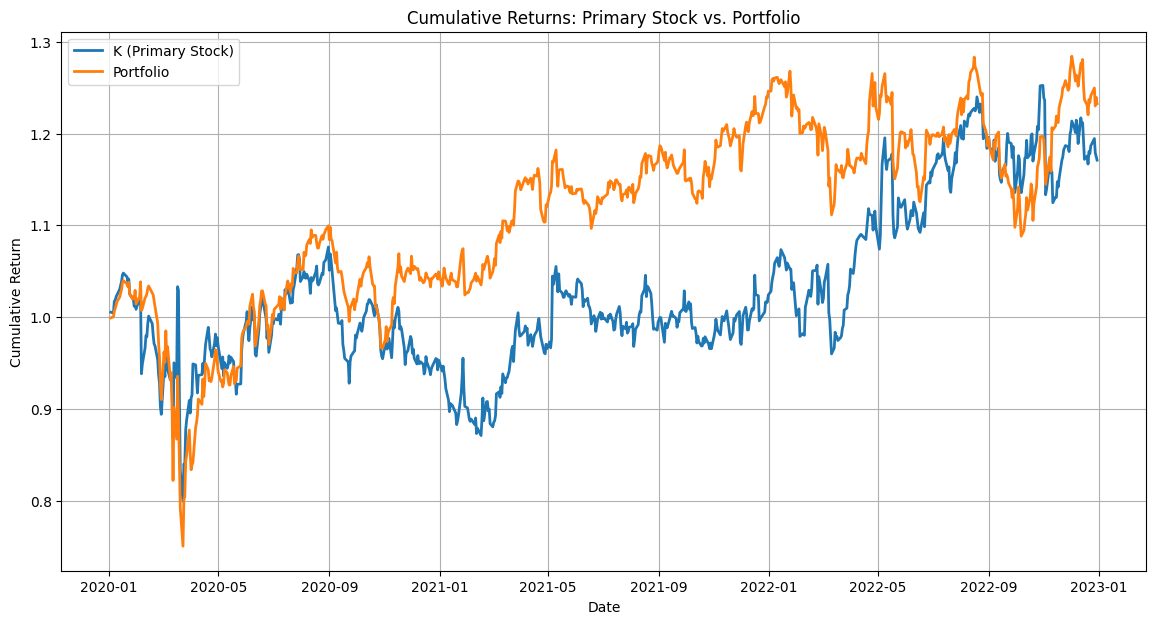

Primary Stock (K) - Mean Daily Return: 0.000332, Volatility: 0.015648, Sharpe Ratio: -2.555912
Portfolio - Mean Daily Return: 0.000368, Volatility: 0.013541, Sharpe Ratio: -2.953693


In [ ]:
# Ticker symbols
tickerSymbol_Kellogg = 'K'
tickerSymbol_KeyCorp = 'KEY'
tickerSymbol_Kimberly = 'KMB'
tickerSymbol_Knight = 'KNX'
tickerSymbol_Kohl = 'KSS'

# Date range
startDate = '2020-01-01'
endDate = '2024-01-01'

# Download historical daily data for each stock
tickers = [tickerSymbol_Kellogg, tickerSymbol_KeyCorp, tickerSymbol_Kimberly, tickerSymbol_Knight, tickerSymbol_Kohl]
data = yf.download(tickers, start=startDate, end=endDate)['Adj Close']

returns = data.pct_change().dropna()

primary_stock = returns[tickerSymbol_Kellogg]

# Construct portfolio
portfolio_weights = constructPortfolio(tickerSymbol_Kellogg, [tickerSymbol_KeyCorp, tickerSymbol_Kimberly, tickerSymbol_Knight, tickerSymbol_Kohl])
portfolio_return = returns.mul(portfolio_weights, axis=1).sum(axis=1)

primary_stock_return_mean = primary_stock.mean()# return is the mean
primary_stock_volatility = primary_stock.std()# risk is volatility - std div

portfolio_return_mean = portfolio_return.mean()
portfolio_volatility = portfolio_return.std()

# Calculate Sharpe Ratios (assuming risk-free rate = 0)
primary_stock_sharpe = primary_stock_return_mean - 0.04 / primary_stock_volatility#sharpe ratio
portfolio_sharpe = portfolio_return_mean -0.04 / portfolio_volatility

# Plot the comparison of cumulative returns
cumulative_returns_primary = (1 + primary_stock).cumprod()
cumulative_returns_portfolio = (1 + portfolio_return).cumprod()

plt.figure(figsize=(14, 7))
plt.plot(cumulative_returns_primary, label=f'{tickerSymbol_Kellogg} (Primary Stock)', linewidth=2)
plt.plot(cumulative_returns_portfolio, label='Portfolio', linewidth=2)
plt.title('Cumulative Returns: Primary Stock vs. Portfolio')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.show()

# Print the results
print(f'Primary Stock ({tickerSymbol_Kellogg}) - Mean Daily Return: {primary_stock_return_mean:.6f}, Volatility: {primary_stock_volatility:.6f}, Sharpe Ratio: {primary_stock_sharpe:.6f}')
print(f'Portfolio - Mean Daily Return: {portfolio_return_mean:.6f}, Volatility: {portfolio_volatility:.6f}, Sharpe Ratio: {portfolio_sharpe:.6f}')


here even tho at some places the primary stock was doing bettter but in general the portfolio is better and also does not vary that much suggesting diversification is better


this graphs' interpretation

1 - If the Portfolio Line is Higher: This suggests that diversification has been beneficial, providing higher cumulative returns compared to investing solely in Primary stock

2 - If the Primary Stock Line is Higher: This suggests that Kellogg outperformed the diversified portfolio, meaning that an investment solely in Primary stock would have yielded better returns over this period.

Correlation MAtrix

[*********************100%%**********************]  5 of 5 completed


Correlation Matrix:
Ticker         K       KEY       KMB       KNX       KSS
Ticker                                                  
K       1.000000  0.130130  0.536100  0.224885  0.081227
KEY     0.130130  1.000000  0.183329  0.386018  0.539642
KMB     0.536100  0.183329  1.000000  0.280465  0.080668
KNX     0.224885  0.386018  0.280465  1.000000  0.338343
KSS     0.081227  0.539642  0.080668  0.338343  1.000000


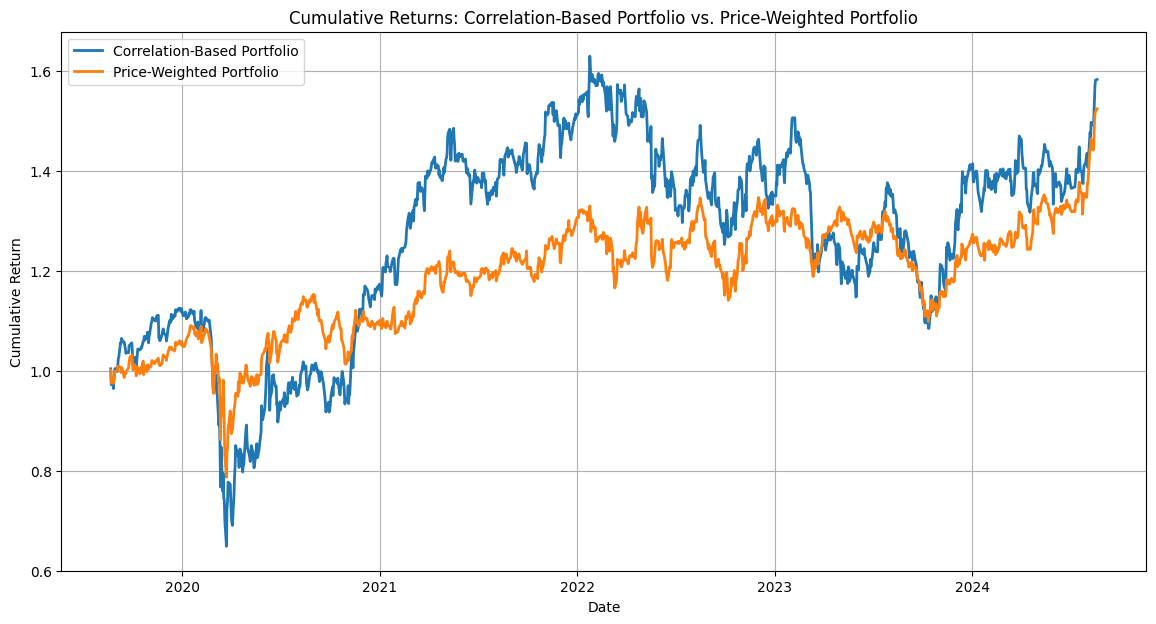

Correlation-Based Portfolio Weights:
K      0.300000
KEY    0.201116
KMB    0.107255
KNX    0.179208
KSS    0.212422
dtype: float64

Price-Weighted Portfolio Weights:
K      0.300000
KEY    0.049949
KMB    0.429081
KNX    0.161242
KSS    0.059729
dtype: float64

Correlation-Based Portfolio - Mean Daily Return: 0.000513, Volatility: 0.017149
Price-Weighted Portfolio - Mean Daily Return: 0.000408, Volatility: 0.011990


In [ ]:
# Ticker symbols
tickerSymbol_Kellogg = 'K'
tickerSymbol_KeyCorp = 'KEY'
tickerSymbol_Kimberly = 'KMB'
tickerSymbol_Knight = 'KNX'
tickerSymbol_Kohl = 'KSS'
startDate = '2020-01-01'
endDate = '2024-01-01'


tickers = [tickerSymbol_Kellogg, tickerSymbol_KeyCorp, tickerSymbol_Kimberly, tickerSymbol_Knight, tickerSymbol_Kohl]
data = yf.download(tickers, start=startDate, end=endDate)['Adj Close']
returns = data.pct_change().dropna()# Calculate daily returns
correlation_matrix = returns.corr()# Correlation Matrix
print("Correlation Matrix:")
print(correlation_matrix)


primary_stock_weight = 0.30 # 30% allocation to the primary stock (Kellogg)


portfolio_weights = constructPortfolio(tickerSymbol_Kellogg, [tickerSymbol_KeyCorp, tickerSymbol_Kimberly, tickerSymbol_Knight, tickerSymbol_Kohl])
portfolio_return_correlation = returns.mul(portfolio_weights, axis=1).sum(axis=1)

portfolio_weights_price = pd.Series([0.30] + [(data.iloc[-1][ticker] / data.iloc[-1][remaining_stocks].sum()) * 0.70 for ticker in remaining_stocks], index=tickers)

# Calculate portfolio returns for the price-weighted portfolio
portfolio_return_price = returns.mul(portfolio_weights_price, axis=1).sum(axis=1)

# Step 4: Compare Portfolio Performance
# Cumulative returns for both portfolios
cumulative_returns_correlation = (1 + portfolio_return_correlation).cumprod()
cumulative_returns_price = (1 + portfolio_return_price).cumprod()


# Print the portfolio weights for comparison
print("Correlation-Based Portfolio Weights:")
print(portfolio_weights)
print("\nPrice-Weighted Portfolio Weights:")
print(portfolio_weights_price)

# Calculate and print mean return and volatility for comparison
mean_return_correlation = portfolio_return_correlation.mean()
volatility_correlation = portfolio_return_correlation.std()

mean_return_price = portfolio_return_price.mean()
volatility_price = portfolio_return_price.std()

print(f'\nCorrelation-Based Portfolio - Mean Daily Return: {mean_return_correlation:.6f}, Volatility: {volatility_correlation:.6f}')
print(f'Price-Weighted Portfolio - Mean Daily Return: {mean_return_price:.6f}, Volatility: {volatility_price:.6f}')


[*********************100%%**********************]  5 of 5 completed


Correlation Matrix:
Ticker         K       KEY       KMB       KNX       KSS
Ticker                                                  
K       1.000000  0.130130  0.536100  0.224886  0.081227
KEY     0.130130  1.000000  0.183329  0.386018  0.539642
KMB     0.536100  0.183329  1.000000  0.280465  0.080668
KNX     0.224886  0.386018  0.280465  1.000000  0.338343
KSS     0.081227  0.539642  0.080668  0.338343  1.000000


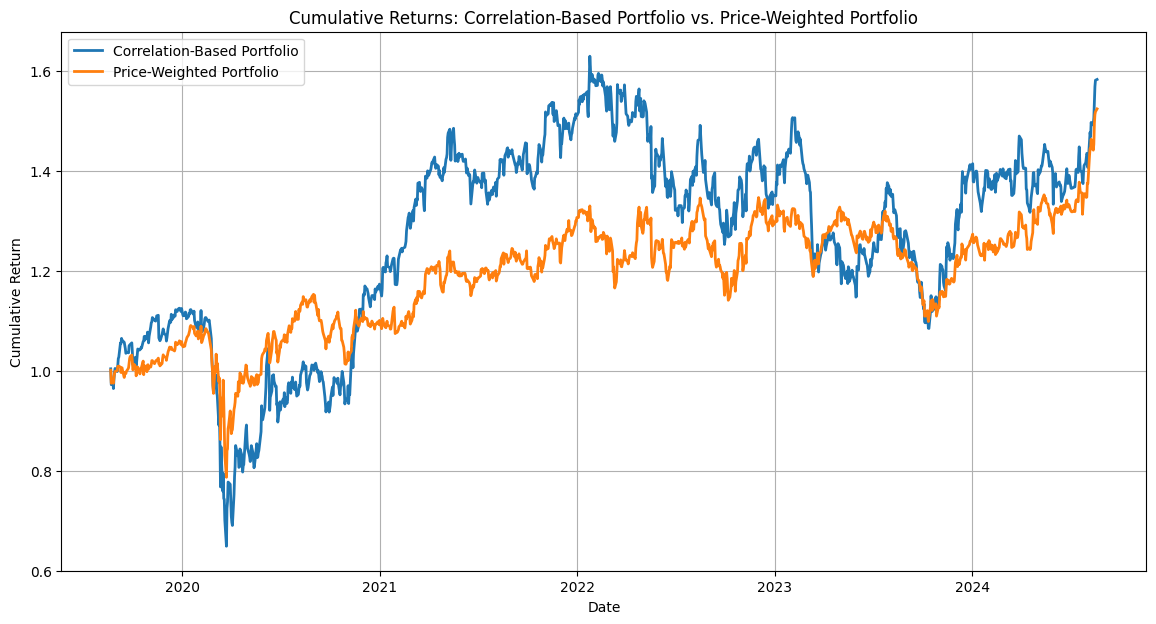

Correlation-Based Portfolio Weights:
K      0.300000
KEY    0.201116
KMB    0.107255
KNX    0.179208
KSS    0.212422
dtype: float64

Price-Weighted Portfolio Weights:
K      0.300000
KEY    0.049949
KMB    0.429081
KNX    0.161242
KSS    0.059729
dtype: float64

Correlation-Based Portfolio - Mean Daily Return: 0.000513, Volatility: 0.017149
Price-Weighted Portfolio - Mean Daily Return: 0.000408, Volatility: 0.011990


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Ticker symbols
tickerSymbol_Kellogg = 'K'
tickerSymbol_KeyCorp = 'KEY'
tickerSymbol_Kimberly = 'KMB'
tickerSymbol_Knight = 'KNX'
tickerSymbol_Kohl = 'KSS'

# Date range
startDate = '2020-01-01'
endDate = '2023-01-01'

tickers = [tickerSymbol_Kellogg, tickerSymbol_KeyCorp, tickerSymbol_Kimberly, tickerSymbol_Knight, tickerSymbol_Kohl]
data = yf.download(tickers, start=startDate, end=endDate)['Adj Close']
returns = data.pct_change().dropna()

correlation_matrix = returns.corr()
print("Correlation Matrix:")
print(correlation_matrix)

# 30% allocation to the primary stock (Kellogg)
primary_stock_weight = 0.30

# Correlation weights (higher weight to stocks with lower correlation with Kellogg)
remaining_stocks = tickers[1:]
correlation_with_primary = correlation_matrix.loc[tickerSymbol_Kellogg, remaining_stocks]
inverse_correlation = 1 - correlation_with_primary
normalized_inverse_correlation = inverse_correlation / inverse_correlation.sum()

# Portfolio weights
portfolio_weights_correlation = pd.Series([primary_stock_weight] + (normalized_inverse_correlation * 0.70).tolist(), index=tickers)

# Calculate portfolio returns
portfolio_return_correlation = returns.mul(portfolio_weights_correlation, axis=1).sum(axis=1)

# Compare with Price-Weighted Portfolio (from part a)
# Reusing portfolio weights from part a:
portfolio_weights_price = pd.Series([0.30] + [(data.iloc[-1][ticker] / data.iloc[-1][remaining_stocks].sum()) * 0.70 for ticker in remaining_stocks], index=tickers)

# Calculate portfolio returns for the price-weighted portfolio
portfolio_return_price = returns.mul(portfolio_weights_price, axis=1).sum(axis=1)

# Step 4: Compare Portfolio Performance
# Cumulative returns for both portfolios
cumulative_returns_correlation = (1 + portfolio_return_correlation).cumprod()
cumulative_returns_price = (1 + portfolio_return_price).cumprod()

# Plot the comparison of cumulative returns
plt.figure(figsize=(14, 7))
plt.plot(cumulative_returns_correlation, label='Correlation-Based Portfolio', linewidth=2)
plt.plot(cumulative_returns_price, label='Price-Weighted Portfolio', linewidth=2)
plt.title('Cumulative Returns: Correlation-Based Portfolio vs. Price-Weighted Portfolio')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.show()

# Print the portfolio weights for comparison
print("Correlation-Based Portfolio Weights:")
print(portfolio_weights_correlation)
print("\nPrice-Weighted Portfolio Weights:")
print(portfolio_weights_price)

# Calculate and print mean return and volatility for comparison
mean_return_correlation = portfolio_return_correlation.mean()
volatility_correlation = portfolio_return_correlation.std()

mean_return_price = portfolio_return_price.mean()
volatility_price = portfolio_return_price.std()

print(f'\nCorrelation-Based Portfolio - Mean Daily Return: {mean_return_correlation:.6f}, Volatility: {volatility_correlation:.6f}')
print(f'Price-Weighted Portfolio - Mean Daily Return: {mean_return_price:.6f}, Volatility: {volatility_price:.6f}')
